In [171]:
!pip install calplot

Defaulting to user installation because normal site-packages is not writeable


In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calplot

pd.set_option('display.max_columns', 999)
%matplotlib inline


In [173]:
df_activities = pd.read_csv('data/garmin_activities.csv')
df_activities.head(99)

,activity_id,name,description,type,course_id,laps,sport,sub_sport,training_effect,anaerobic_training_effect,start_time,stop_time,elapsed_time,moving_time,distance,cycles,avg_hr,max_hr,avg_rr,max_rr,calories,avg_cadence,max_cadence,avg_speed,max_speed,ascent,descent,max_temperature,min_temperature,avg_temperature,start_lat,start_long,stop_lat,stop_long,hr_zones_method,hrz_1_hr,hrz_2_hr,hrz_3_hr,hrz_4_hr,hrz_5_hr,hrz_1_time,hrz_2_time,hrz_3_time,hrz_4_time,hrz_5_time
0,10648586889,Delhi - Run,NaN,uncategorized,NaN,4,running,generic,3.0,0.0,2023-03-07 11:09:59.000000,2023-03-07 11:31:37.000000,00:20:39.419000,00:20:39.419000,1.765769,1536.0,156.0,175.0,NaN,NaN,304,74.0,78.0,5.129294,6.220919,308.398951,314.960630,260.6,NaN,260.6,39.108382,-84.642952,39.108097,-84.642101,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:14.025000,00:00:29.901000,00:04:42.998000,00:13:31.988000,00:00:00.000000
1,10417511167,Rowing 1 on 2 soft,NaN,uncategorized,NaN,6,fitness_equipment,indoor_rowing,0.6,0.0,2023-01-31 11:26:30.000000,2023-01-31 11:34:47.000000,00:08:10.241000,00:08:10.241000,0.000000,193.0,121.0,136.0,NaN,NaN,85,26.0,42.0,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:01:56.632000,00:05:35.159000,00:00:00.000000,00:00:00.000000,00:00:00.000000
2,10668176472,Run,NaN,uncategorized,NaN,4,running,treadmill,3.1,0.0,2023-03-10 12:19:35.000000,2023-03-10 12:47:32.000000,00:27:40.310000,00:27:40.310000,2.210826,1999.0,151.0,165.0,NaN,NaN,392,72.0,78.0,4.793754,5.782480,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:25.211000,00:01:30.001000,00:06:03.000000,00:17:27.982000,00:00:00.000000
3,10379514802,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.8,0.0,2023-01-25 12:41:01.000000,2023-01-25 12:49:53.000000,00:08:07.495000,00:08:07.495000,0.000000,NaN,124.0,138.0,NaN,NaN,90,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:02:49.395000,00:05:18.100000,00:00:00.000000,00:00:00.000000,00:00:00.000000
4,10413760580,Rowing 1 on 2 soft,NaN,uncategorized,NaN,16,fitness_equipment,indoor_rowing,2.1,0.0,2023-01-30 20:38:20.000000,2023-01-30 21:01:06.000000,00:22:39.973000,00:21:07.919000,0.000000,606.0,137.0,155.0,NaN,NaN,272,29.0,46.0,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:49.885000,00:08:08.366000,00:11:39.585000,00:00:00.000000,00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,10602051136,Treadmill Running,NaN,uncategorized,NaN,1,running,treadmill,2.3,0.0,2023-02-28 11:36:34.000000,2023-02-28 11:50:54.000000,00:13:52.303000,00:13:52.303000,1.109999,1010.0,146.0,158.0,NaN,NaN,196,73.0,78.0,4.800464,4.570060,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:09.001000,00:01:32.999000,00:11:26.687000,00:00:10.999000,00:00:00.000000
95,10327182441,Walk/Run Repeats,NaN,uncategorized,NaN,7,running,treadmill,3.1,0.1,2023-01-17 11:13:35.000000,2023-01-17 11:33:51.000000,00:20:00.000000,00:20:00.000000,1.362599,1440.0,161.0,176.0,NaN,NaN,325,72.0,78.0,4.086882,4.780332,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:22.886000,00:00:23.999000,00:02:25.882000,00:15:37.520000,00:00:00.000000
96,10529922446,Indoor Rowing,NaN,uncategorized,NaN,1,fitness_equipment,indoor_rowing,0.8,0.0,2023-02-17 11:37:51.000000,2023-02-17 11:48:14.000000,00:10:13.331000,00:10:13.331000,0.000000,251.0,124.0,136.0,NaN,NaN,111,24.0,26.0,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:01:12.998000,00:08:39.085000,00:00:00.000000,00:00:00.000000,00:00:00.000000
97,10609164476,Delhi Running,NaN,uncategorized,NaN,4,running,generic,3.3,0.0,2023-03-01 11:50:10.000000,2023-03-0

In [174]:
df_activities.loc[(df_activities['sport'] == 'fitness_equipment'), 'sport'] = df_activities['sub_sport'] 

In [175]:
df_activities['start_time'] = pd.to_datetime(df_activities['start_time'])

df_activities['date'] = df_activities['start_time'].apply(lambda x : x.date())

In [176]:
df_activities['date'] = pd.to_datetime(df_activities['date'])
df_activities['month'] = df_activities['date'].apply(lambda x: x.month)
df_activities['week'] = df_activities['date'].apply(lambda x: x.week)
df_activities['day'] = df_activities['date'].apply(lambda x: x.day_name())

In [177]:
df_activities['hour'] = df_activities['start_time'].apply(lambda x: x.hour)

In [178]:
df_activities['sport'] = pd.Categorical(df_activities['sport'])

In [179]:
df_activities.sort_values(by='start_time', ascending=True, inplace=True, ignore_index=True)

In [180]:
df_activities

,activity_id,name,description,type,course_id,laps,sport,sub_sport,training_effect,anaerobic_training_effect,start_time,stop_time,elapsed_time,moving_time,distance,cycles,avg_hr,max_hr,avg_rr,max_rr,calories,avg_cadence,max_cadence,avg_speed,max_speed,ascent,descent,max_temperature,min_temperature,avg_temperature,start_lat,start_long,stop_lat,stop_long,hr_zones_method,hrz_1_hr,hrz_2_hr,hrz_3_hr,hrz_4_hr,hrz_5_hr,hrz_1_time,hrz_2_time,hrz_3_time,hrz_4_time,hrz_5_time,date,month,week,day,hour
0,10275535173,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.2,0.0,2023-01-09 11:14:38,2023-01-09 11:18:50.000000,00:04:01.260000,00:04:01.260000,0.000000,NaN,107.0,121.0,NaN,NaN,38,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:03:12.999000,00:00:18.862000,00:00:00.000000,00:00:00.000000,00:00:00.000000,2023-01-09,1,2,Monday,11
1,10275535206,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.4,0.0,2023-01-09 11:19:07,2023-01-09 11:24:07.000000,00:04:46.379000,00:04:46.379000,0.000000,NaN,121.0,127.0,NaN,NaN,60,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:44.698000,00:04:01.681000,00:00:00.000000,00:00:00.000000,00:00:00.000000,2023-01-09,1,2,Monday,11
2,10275535247,Treadmill Running,NaN,uncategorized,NaN,2,running,treadmill,2.6,0.0,2023-01-09 11:27:01,2023-01-09 11:39:21.000000,00:11:54.340000,00:11:54.340000,0.999998,868.0,154.0,166.0,NaN,NaN,218,73.0,76.0,5.039817,6.534090,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:15.000000,00:00:21.001000,00:02:20.000000,00:08:09.335000,00:00:00.000000,2023-01-09,1,2,Monday,11
3,10275535278,Treadmill Running,NaN,uncategorized,NaN,2,running,treadmill,2.8,0.0,2023-01-09 11:39:38,2023-01-09 11:52:27.000000,00:12:42.370000,00:12:42.370000,1.081434,918.0,164.0,173.0,NaN,NaN,249,72.0,78.0,5.106925,6.135916,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:00.000000,00:00:27.063000,00:02:11.307000,00:10:03.997000,00:00:00.000000,2023-01-09,1,2,Monday,11
4,10278242382,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.8,0.0,2023-01-09 20:59:26,2023-01-09 21:15:27.000000,00:14:17.384000,00:14:17.384000,0.000000,NaN,115.0,137.0,NaN,NaN,152,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:06:29.195000,00:06:35.999000,00:00:00.000000,00:00:00.000000,00:00:00.000000,2023-01-09,1,2,Monday,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,10837894905,Indoor Cycling,NaN,uncategorized,NaN,1,cycling,indoor_cycling,0.7,0.0,2023-04-04 22:57:33,2023-04-04 23:20:36.000000,00:20:04.310000,00:20:04.310000,0.000000,NaN,114.0,122.0,NaN,NaN,163,NaN,NaN,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:17:50.309000,00:02:01.002000,00:00:00.000000,00:00:00.000000,00:00:00.000000,2023-04-04,4,14,Tuesday,22
143,10841977785,Delhi - Long Easy Run,NaN,uncategorized,NaN,5,running,generic,2.6,0.0,2023-04-05 12:10:55,2023-04-05 12:42:34.000000,00:31:38.866000,00:31:38.866000,2.373035,2310.0,156.0,173.0,NaN,NaN,406,73.0,78.0,4.498478,4.863099,262.467192,314.96063,260.6,NaN,260.6,39.108464,-84.643029,39.10715,-84.639472,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:00:29.130000,00:00:33.212000,00:15:57.044000,00:14:37.939000,00:00:00.000000,2023-04-05,4,14,Wednesday,12
144,10848714934,Stair Stepper,NaN,uncategorized,NaN,1,stair_climbing,stair_climbing,2.5,0.0,2023-04-06 12:54:28,2023-04-06 13:21:09.000000,00:25:05.938000,00:25:05.938000,0.000000,7.0,136.0,162.0,NaN,NaN,304,NaN,82.0,0.000000,NaN,NaN,NaN,260.6,NaN,260.6,NaN,NaN,NaN,NaN,max_heart_rate,99.0,119.0,139.0,158.0,178.0,00:05:56.968000,00:08:57.997000,00:05:49.999000

Text(0.5, 1.0, 'Activities Amount')

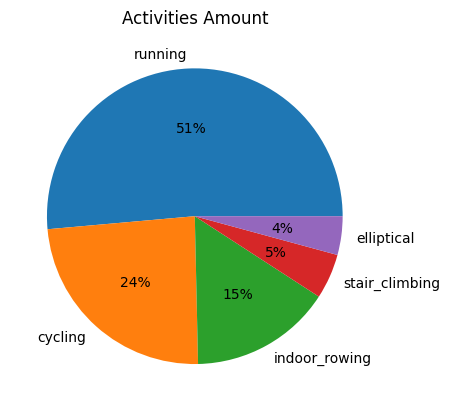

In [181]:
activities_pie = df_activities['sport'].value_counts()[:5].plot(kind='pie', autopct='%.0f%%',)
activities_pie.set_ylabel('')
activities_pie.set_title('Activities Amount')

<Axes: xlabel='sport'>

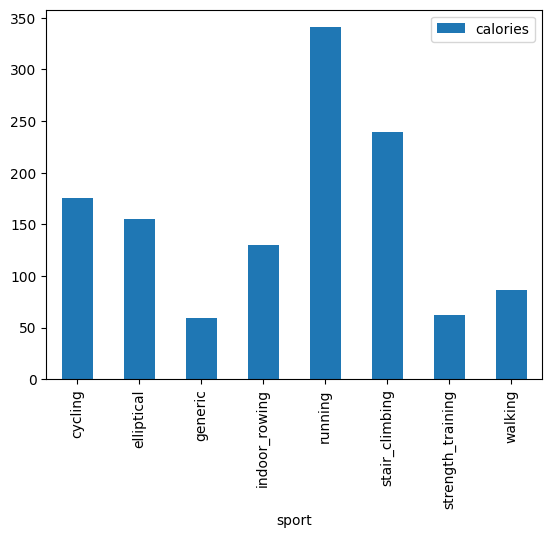

In [182]:
df_activities.groupby('sport').agg({
    'calories' : 'mean'
}).plot(kind='bar')

<Axes: xlabel='day', ylabel='calories'>

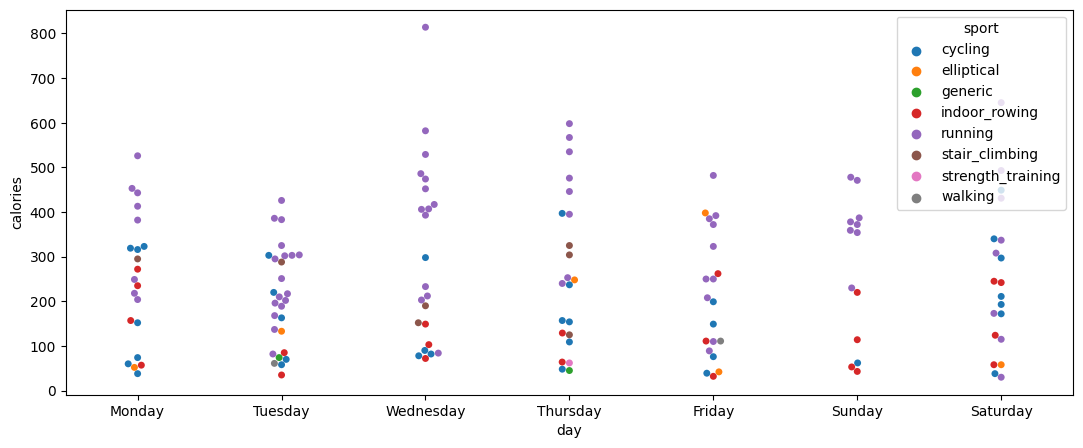

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

sns.swarmplot(data=df_activities, x='day', y='calories', hue='sport', ax=ax,)

<Axes: xlabel='week', ylabel='calories'>

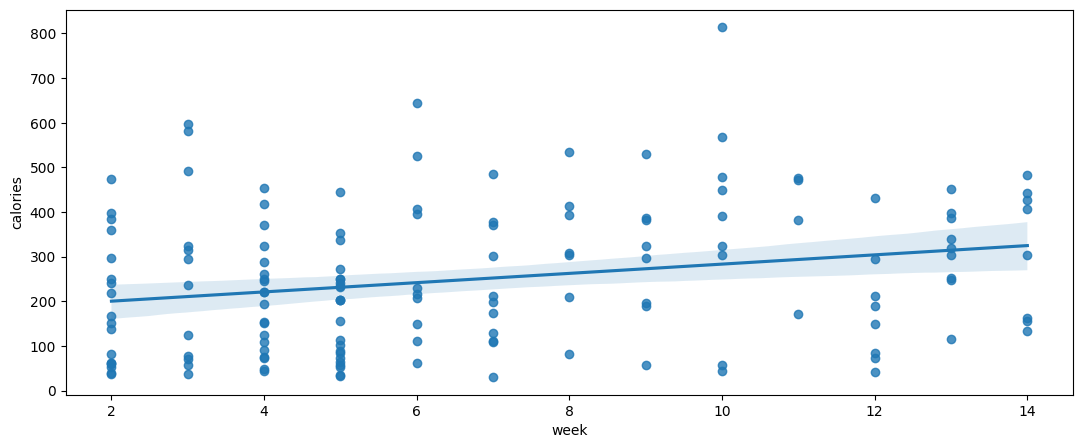

In [184]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

sns.regplot(data=df_activities, x='week', y='calories',)

<Axes: xlabel='week', ylabel='avg_hr'>

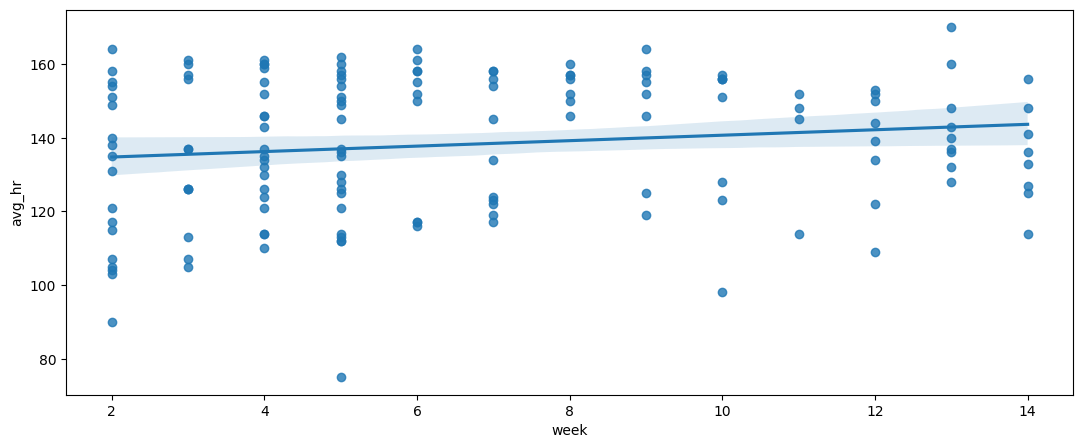

In [185]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))

sns.regplot(data=df_activities, x='week', y='avg_hr',)

<Axes: ylabel='Frequency'>

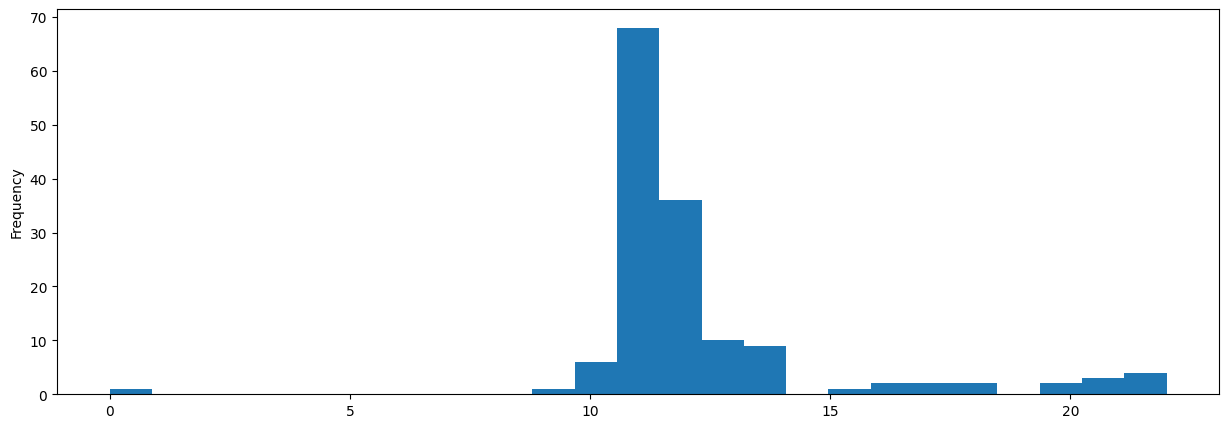

In [186]:
fig, ax1 = plt.subplots(figsize=(15, 5))

df_activities['hour'].plot(kind='hist', bins=25, )

In [187]:
df_date_index = df_activities.set_index('date')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


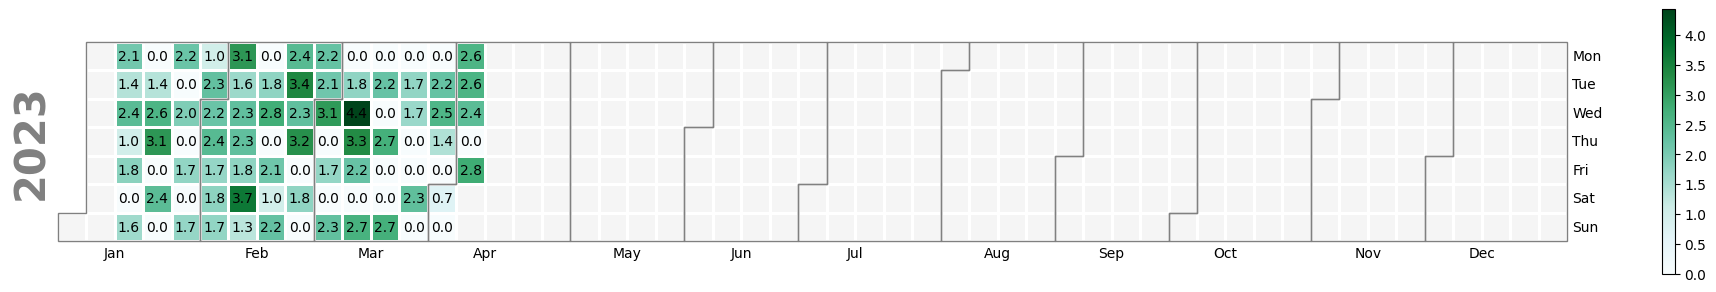

In [188]:
pl1 = calplot.calplot(data=df_date_index['distance'], how='sum', figsize=(20, 3), suptitle='', textformat="{:1.1f}", cmap='BuGn')

In [189]:
df_activities.corr(numeric_only=True)

,activity_id,description,course_id,laps,training_effect,anaerobic_training_effect,distance,cycles,avg_hr,max_hr,avg_rr,max_rr,calories,avg_cadence,max_cadence,avg_speed,max_speed,ascent,descent,max_temperature,min_temperature,avg_temperature,start_lat,start_long,stop_lat,stop_long,hrz_1_hr,hrz_2_hr,hrz_3_hr,hrz_4_hr,hrz_5_hr,month,week,hour
activity_id,1.000000,NaN,NaN,0.012801,0.224009,-0.128422,0.221322,0.240323,0.138580,0.130846,NaN,NaN,0.243902,0.165905,0.031538,0.150692,-0.010285,0.163045,0.085943,NaN,NaN,NaN,0.103228,-0.028550,0.003237,0.127833,NaN,NaN,NaN,NaN,NaN,0.946077,0.997323,0.191374
description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
laps,0.012801,NaN,NaN,1.000000,0.330526,0.124885,0.423510,0.317201,0.282352,0.280112,NaN,NaN,0.385722,0.036788,-0.034388,0.296743,0.051445,0.478356,0.558065,NaN,NaN,NaN,0.271507,0.040303,0.024914,0.084043,NaN,NaN,NaN,NaN,NaN,0.076085,0.012973,0.022608
training_effect,0.224009,NaN,NaN,0.330526,1.000000,0.182457,0.770505,0.797491,0.890060,0.916754,NaN,NaN,0.858264,0.723572,0.683661,0.740704,0.110507,0.647787,0.671581,NaN,NaN,NaN,0.544208,0.169485,0.111722,0.325627,NaN,NaN,NaN,NaN,NaN,0.200557,0.226987,0.082252
anaerobic_training_effect,-0.128422,NaN,NaN,0.124885,0.182457,1.000000,0.160735,0.109055,0.211932,0.250956,NaN,NaN,0.142622,0.155887,0.186919,0.205318,0.011080,-0.164707,0.013627,NaN,NaN,NaN,-0.073589,-0.109828,-0.541657,-0.211047,NaN,NaN,NaN,NaN,NaN,-0.111291,-0.123993,-0.033656
distance,0.221322,NaN,NaN,0.423510,0.770505,0.160735,1.000000,0.968510,0.696404,0.648017,NaN,NaN,0.833062,0.750742,0.602210,0.836244,0.107925,0.819123,0.856068,NaN,NaN,NaN,0.462028,0.141038,0.260860,0.251518,NaN,NaN,NaN,NaN,NaN,0.248890,0.222178,0.029975
cycles,0.240323,NaN,NaN,0.317201,0.797491,0.109055,0.968510,1.000000,0.619941,0.615293,NaN,NaN,0.950418,0.684371,0.566249,0.682994,0.083519,0.800791,0.844511,NaN,NaN,NaN,0.458483,0.067115,0.274485,0.191744,NaN,NaN,NaN,NaN,NaN,0.265759,0.241792,0.102422
avg_hr,0.138580,NaN,NaN,0.282352,0.890060,0.211932,0.696404,0.619941,1.000000,0.935071,NaN,NaN,0.658857,0.801555,0.688098,0.805907,0.143531,0.436016,0.577436,NaN,NaN,NaN,0.330177,0.149110,-0.030629,0.274161,NaN,NaN,NaN,NaN,NaN,0.113701,0.147025,0.080469
max_hr,0.130846,NaN,NaN,0.280112,0.916754,0.250956,0.648017,0.615293,0.935071,1.000000,NaN,NaN,0.685894,0.738047,0.712770,0.737786,0.162025,0.391793,0.576005,NaN,NaN,NaN,0.371425,0.087352,-0.072397,0.218358,NaN,NaN,NaN,NaN,NaN,0.105453,0.138582,0.056215
